In [1]:
from utils.trafalgar import efficient_frontier

[*********************100%***********************]  4 of 4 completed
Return with Maximum SR (in %):
118.42553249487378
Volality with Maximum SR (in %):
26.001520797348753
Max Sharpe Ratio:
4.554561766515943
Optimized allocation (in %):
[77.39702781529013, 0.20572051810762, 20.743794526729843, 1.6534571398724047]


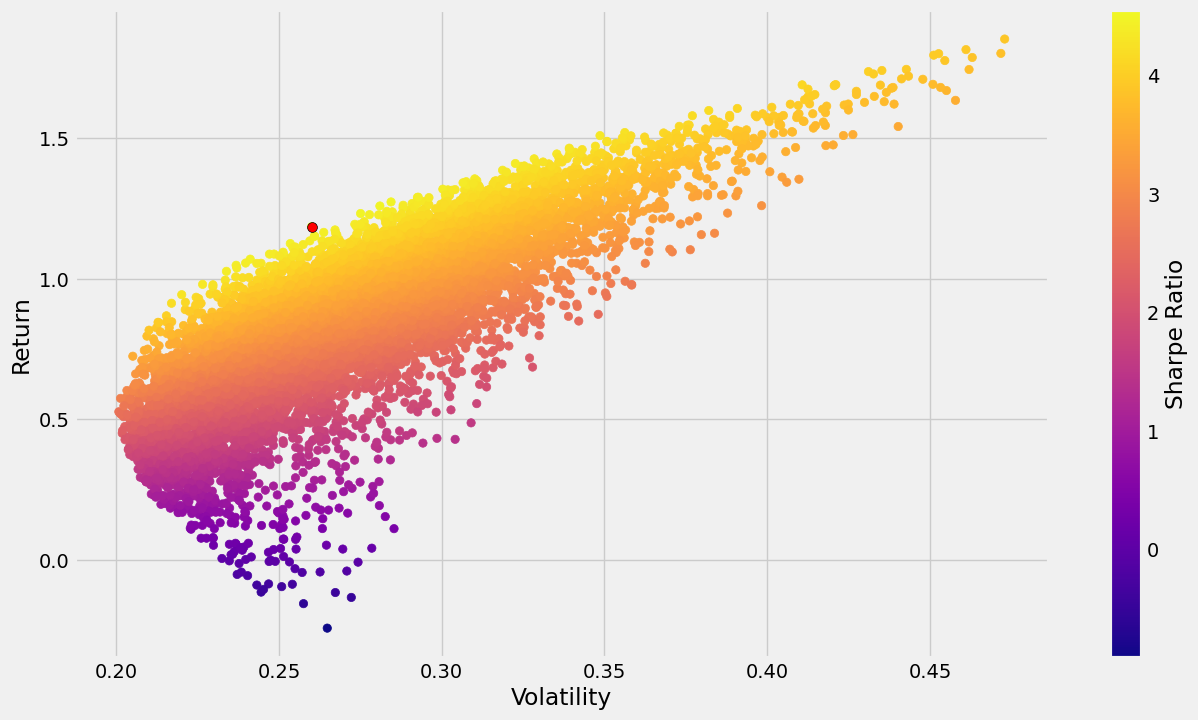

In [2]:
allocation=efficient_frontier(["AAPL", "META","MSFT","BAC"], '2023-01-01', '2023-05-01', 10000)

In [3]:
allocation

[77.39702781529013, 0.20572051810762, 20.743794526729843, 1.6534571398724047]